## Python statistics Simulation and Bootstrapping

Standard imports

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import scipy.stats
import scipy.optimize
import scipy.spatial

%matplotlib inline

In [4]:
poll = pd.read_csv('poll.csv')

In [5]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [6]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

Function that generate n random observations for the votes

In [7]:
def sample(n, Brown_Treshold):
    ''' 
        Generates n random observations for the poll and use the threshold value 
        to consider the random numbers as different candidates 
    '''
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < Brown_Treshold, 'Brown', 'Green')})

Take one sample from the population

In [8]:
df_sample = sample(1000, 0.511)

df_sample.vote.value_counts(normalize=True)

Green    0.502
Brown    0.498
Name: vote, dtype: float64

Now repeat this 1000 times ----> Bootstrapping

In [12]:
dist = pd.DataFrame([sample(1000, 0.511).vote.value_counts(normalize=True) for i in range(1000)])
dist.head()

,Brown,Green
vote,0.540,0.460
vote,0.523,0.477
vote,0.502,0.498
vote,0.517,0.483
vote,0.503,0.497


<AxesSubplot:>

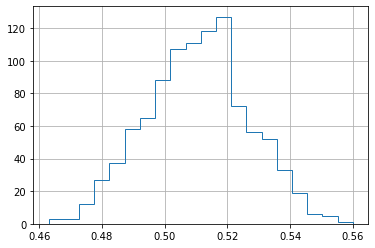

In [21]:
dist.Brown.hist(histtype = 'step',bins = 20)

<AxesSubplot:>

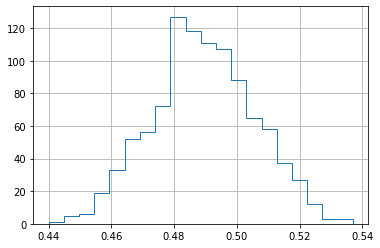

In [22]:
dist.Green.hist(histtype = 'step',bins = 20)

In [25]:
sample(1000, 0.52).value_counts(normalize=True)

vote 
Brown    0.529
Green    0.471
dtype: float64

In [39]:
def samplingdist(n, brown_ratio):
    return pd.DataFrame([sample(n, brown_ratio).vote.value_counts(normalize=True) for i in range(1000)])

In [27]:
samplingdist(1000, 0.51)

vote,Brown,Green
0,0.540,0.460
1,0.520,0.480
2,0.517,0.483
3,0.518,0.482
4,0.517,0.483
...,...,...
995,0.498,0.502
996,0.507,0.493
997,0.507,0.493
998,0.497,0.503


In [43]:
def quantiles(n, brown_ratio, alpha = 0.025):
    '''
        Generates a (1-alpha)% confidence interval for the mean of Brown's votes 
    '''

    df = samplingdist(n, brown_ratio)
    return (df.Brown.quantile(alpha), df.Brown.quantile(1-alpha))

In [44]:
quantiles(1000,0.50)

(0.467, 0.529)

In [45]:
quantiles(1000,0.48)

(0.45, 0.510025)

In [46]:
quantiles(1000,0.54)

(0.51, 0.57)

So, we look at different thresholds and see which two ratios will give us 0.51 as the upper and lower bounds of the quantiles:

The 95% Confidence Interval for the mean of Brown's votes is (0.48,0.54)

<AxesSubplot:>

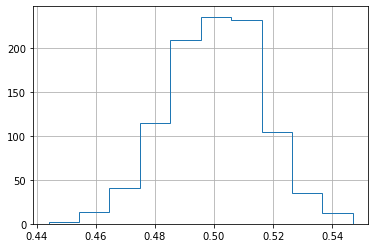

In [47]:
dist = samplingdist(1000,0.50)
dist.Brown.hist(histtype = 'step')

In [48]:
largepoll = pd.read_csv('poll-larger.csv')

In [49]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64